In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class RlAgent:
    def _init_(self, environment):
        self.environment = environment
    
    def train(self):
        pass
    
    def select_model(self, new_data):
        return 'RandomForest'

In [3]:
class DatasetEnvironment:
    def _init_(self, dataset):
        self.dataset = dataset
    
    def get_dataset_characteristics(self):
        pass
    
    def get_problem_requirements(self):
        pass

In [4]:
# Load the data from UCI repository

train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows=1, header=None)

In [5]:
# Define column labels
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train.columns = col_labels
test.columns = col_labels

In [6]:
# Dropping features that are not required
# Drop 'fnlwgt' column as it's not useful for prediction
train.drop('fnlwgt', axis=1, inplace=True)
test.drop('fnlwgt', axis=1, inplace=True)

In [7]:
# Convert target variable to binary
train['wage_class'] = train['wage_class'].apply(lambda x: 0 if x.strip() == '<=50K' else 1)
test['wage_class'] = test['wage_class'].apply(lambda x: 0 if x.strip() == '<=50K.' else 1)

In [8]:
# Feature engineering
for dataset in [train, test]:
    dataset['native_country'] = np.where(dataset['native_country'] == ' United-States', 1, 0)
    dataset['marital_status'] = dataset['marital_status'].replace({' Married-civ-spouse': 'Married', ' Never-married': 'Single',
                                                           ' Separated': 'Divorced', ' Married-spouse-absent': 'Divorced',
                                                           ' Divorced': 'Divorced', ' Married-AF-spouse': 'Divorced', ' Widowed': 'Widowed'})
    dataset['workclass'] = np.where(dataset['workclass'] == ' Private', 1, 0)
    dataset['sex'] = np.where(dataset['sex'] == ' Male', 1, 0)
    dataset['race'] = np.where(dataset['race'] == ' White', 1, 0)

In [9]:
# One hot encoding
# Convert categorical features to one-hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [10]:
# Ensure categorical features are encoded consistently between train and test data
train, test = train.align(test, join='left', axis=1, fill_value=0)

In [11]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=20)
X_train = train.drop('wage_class', axis=1)
y_train = train['wage_class']
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=20)

In [12]:
# Make predictions on the test set
X_test = test.drop('wage_class', axis=1)
y_test = test['wage_class']  # Define y_test
test_predictions = rf_model.predict(X_test)

In [13]:
# Evaluate the model
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Set Accuracy (Random Forest): {test_accuracy}")

Test Set Accuracy (Random Forest): 0.8476752042257847


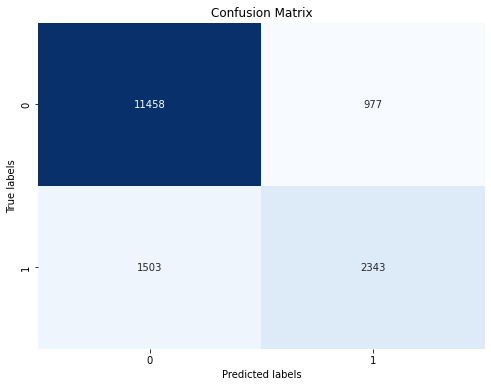

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.71      0.61      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.79      0.77      0.78     16281
weighted avg       0.84      0.85      0.84     16281



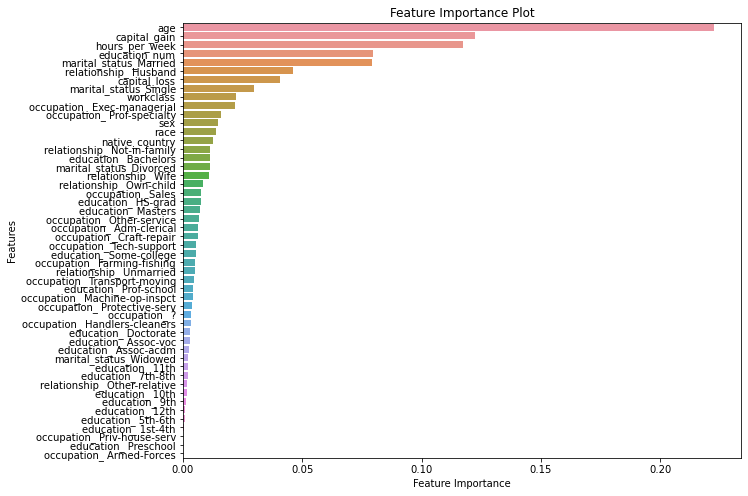

In [16]:
# Feature Importance Plot
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = X_train.columns
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()